# Mental Health Evaluation through Text Analysis

umbrella project documentation

Gabriel Bonnin (Ruhr University Bochum, Germany)

> **Note**
>
> { width="180px"}
>
> This project is supported by the [Ruhr University Bochum Research School](https://www.research-school.rub.de).

# Abstract

Psychotherapy is one of the most effective treatments for mental health problems, but its success depends on accurate diagnostic assessments. Current assessment practices largely rely on standardized closed-ended scales that, while reliable, may fail to capture the complexity, context and individuality of patients’ mental states. Advances in artificial intelligence (AI) and natural language processing (NLP) enable the measurement of psychological constructs through natural language, offering a promising complement to traditional assessment methods by leveraging patients’ own descriptions of their experiences.

While previous NLP-based mental health research has primarily focused on social media language, this project applies state-of-the-art large language models (LLMs) to open-ended intake data from a German outpatient psychotherapy clinic. Before therapy, patients describe the development, context, and perceived causes of their problems, as well as their current difficulties and therapy goals, in their own words. These texts are linked to key clinical measures, including diagnoses, symptom severity, functional impairment, and treatment outcomes, providing an ecologically valid resource for studying language-based assessment in real-world clinical settings.

The project comprises several complementary substudies. First, we examine whether patient language at intake reflects cross-sectional symptom severity and impairment and whether it provides incremental information beyond established self-report questionnaires. Second, we conduct a thematic analysis of patient responses to different open-ended prompts to characterize recurring themes. Third, we evaluate whether pre-therapy language predicts longitudinal treatment outcomes beyond baseline symptom measures.

Together, these studies aim to clarify how patient-generated language can be used for assessment, interpretation, and prognosis in psychotherapy. The findings are intended to inform the development of clinically meaningful, language-based assessment tools that support personalized care and contribute to the modernization of mental health evaluation.

# Introduction

Mental health problems pose a significant global challenge, accounting for a considerable proportion of deaths and disability-adjusted life years \[@WorldHealthOrganization2017\]. Psychotherapy is an effective and sustainable intervention for reducing symptoms and improving quality of life \[@wampold2015great; @chorpita2011evidence\], but it’s success critically depends on accurate assessments \[@Lutz2022; @Jensen-Doss2008\].

Standardized closed-ended tools such as the Beck Depression Inventory-II \[@Beck1996\] rely on numerical scales \[@Likert1932\] to structure and standardize assessments and are widely used in clinical research and practice. While these methods have advanced replicability and reliability in psychological assessment, they can miss important individual differences by restricting responses to pre-defined categories, limiting the ability to capture the complexity of mental states \[@Kjell2024\].

Recent advances in AI, particularly transformer-based LLMs \[@Vaswani2017\], present promising solutions to these limitations \[@Kjell2024\]. LLMs excel in analyzing context-rich natural language with remarkable accuracy across diverse tasks \[@devlin-etal-2019-bert\]. Open-ended response formats, where patients describe their experiences in their own words, provide high-dimensional, context-rich information that remains underutilized in current assessment practices. Empirical studies highlight the potential of NLP-based analysis of open-ended responses, achieving moderate convergence with closed-ended rating scales using traditional NLP methods \[@kjell2019semantic\] and nearing theoretical upper limits of accuracy with LLMs \[@Kjell2022\]. Preliminary research also highlights their potential for predicting clinically significant outcomes, including suicide risk \[@zirikly-etal-2019-clpsych; @mohammadi-etal-2019-clac-clpsych; @matero-etal-2019-suicide\].

However, much of the existing literature relies on social media or non-clinical text data, raising concerns about ecological validity and clinical relevance. In contrast, open-ended patient responses are routinely collected in clinical settings as part of pre-therapy intake procedures but remain largely underused in empirical research. At the Mental Health Research and Treatment Center at Ruhr University Bochum, patients respond to multiple prompts addressing the development and context of their problems, perceived causes, social reactions, current difficulties, and therapy goals. These narratives are linked to structured diagnostic interviews, repeated symptom assessments, clinician ratings, and longitudinal outcome measures. This unique, large-scale, and longitudinal clinical dataset enables a comprehensive examination of patient language across multiple analytic perspectives.

Accordingly, the present project is organized into three complementary substudies. The first investigates whether pre-therapy language reflects cross-sectional symptom severity and clinician-rated impairment and whether language-based representations provide incremental information beyond standardized self-report questionnaires. The second focuses on the semantic content and structure of patient narratives, using question-specific analyses to identify recurring themes and selective response patterns in how patients conceptualize their mental health problems. The third evaluates the prognostic value of pre-therapy language by testing whether patient narratives predict treatment response and individualized goal attainment over time, beyond baseline symptom severity.

By integrating assessment, interpretive, and prognostic perspectives, this project aims to advance the clinical use of natural language in psychotherapy. Ultimately, the findings seek to support more nuanced, patient-centered assessment practices and contribute to the development of language-based tools that complement existing diagnostic frameworks and inform personalized treatment planning.

# Shared Methods

All substudies draw on the same clinical cohort and share a common set of intake and outcome variables. The shared dataset comprises (a) pre-therapy intake data, including sociodemographics, standardized psychometric questionnaires, and question-specific open-ended patient narratives, and (b) longitudinal clinical measures collected repeatedly during and after treatment. Textual analyses are based exclusively on pre-therapy narratives, while psychometric and clinician-rated measures are used as cross-sectional outcomes, covariates, or longitudinal endpoints depending on the substudy.

The following sections describe the shared dataset, preprocessing pipeline, and measurement instruments used across all substudies.

## Measures

### Sociodemographic and context measures

Sociodemographic information included age, sex, marital and relationship status, general educational attainment, vocational qualification, and current work ability. Contextual variables captured prior psychological or psychiatric treatment and the manner in which therapy ended (e.g., regular completion, dropout).

### Responses from open-ended questions before therapy

At the start of therapy, patients complete two separate questionnaires designed to assess key aspects of their mental health concerns, functional impairments, and expectations for treatment. Questions 1–9 come from the first questionnaire (*Fragebogen zur Lebensgeschichte*), and questions 10–12 come from the second (*Eingangsfragebogen*). The questions include:

1.  **Problem development:** ‘Briefly describe how the problems for which you are seeking treatment have developed over time.’ (german original question: „Beschreiben Sie kurz, wie sich Ihre Probleme, wegen derer Sie eine Behandlung aufsuchen, im Laufe der Zeit entwickelt haben.”)
2.  **Extra stressors:** ‘What causes you stress in addition to your everyday problems (e.g. finances, housing situation)?’ (german original question: „Was macht Ihnen zusätzlich zu Ihren Problemen im Alltag Stress (z. B. Finanzen, Wohnsituation)?“)
3.  **Pre-onset changes:** ‘Did something special change in your life before the onset of your symptoms? (e.g. death of an important person, divorce or separation, change in work situation or income, addition to the family)’ (german original question: „Hat sich vor dem Beginn Ihrer Beschwerden etwas Besonderes in Ihrem Leben verändert? (z. B. Tod einer wichtigen Bezugsperson, Scheidung oder Trennung, Veränderung der Arbeitssituation oder des Einkommens, Familienzuwachs)“)
4.  **Event connection:** ‘Do you see a connection between the event(s) and the development of your problems?’ (german original question: „Sehen Sie einen Zusammenhang zwischen dem Ereignis/den Ereignissen und der Entwicklung Ihrer Probleme?“)
5.  **Physical symptoms:** ‘Are there any physical side effects when your problems occur?’ (german original question: „Gibt es körperliche Begleiterscheinungen, wenn Ihre Probleme auftreten?“)
6.  **Problem causes:** ‘What do you think are the causes of your problems?’ (german original question: „Welche Ursachen sehen Sie für Ihre Probleme?“)
7.  **Expected improvements:** ‘What would improve in your life if you no longer had your problems?’ (german original question: „Was würde sich in Ihrem Leben verbessern, wenn Sie ihre Probleme nicht mehr hätten?“)
8.  **Environment response:** ‘How does your environment (partner, family, friends, work colleagues) react to your problems?’ (german original question: „Wie reagiert Ihre Umwelt (Partner:in, Familie, Freund:innen, Arbeitskolleg:innen) auf die Probleme?“)
9.  **No change required:** ‘What should not change under any circumstances as a result of the therapy?’ (german original question: „Was sollte sich durch die Therapie auf keinen Fall verändern?“)
10. **Problem description:** ‘Finally, please describe in your own words the problems for which you would like treatment.’ (german original question: „Beschreiben Sie zum Abschluss bitte noch einmal in eigenen Worten Ihre Probleme, deretwegen Sie eine Behandlung wünschen.“)
11. **Impacted life areas:** ‘In which areas of your life do these problems limit you (e.g. job, relationship)?’ (german original question: „In welchen Lebensbereichen schränken Sie diese Probleme ein (z. B. Beruf, Partnerschaft)?“)
12. **Therapy goals:** ‘What would you like to achieve for yourself in therapy?’ (german original question: „Was möchten Sie in der Therapie für sich erreichen?“)

### Psychometric measures

Clinical and psychometric variables were retrieved from the FBZ database and included diagnostic information, self-report symptom measures, therapist- and patient-rated outcome measures, positive mental health indicators, and therapeutic process variables. Diagnoses were coded according to DSM-5 and ICD-10 criteria. Symptom severity and treatment outcomes were assessed using a combination of standardized self-report questionnaires and clinician-rated instruments administered at different points during treatment.

#### Diagnosis

Diagnosis at the outpatient clinic is conducted using structured clinical interviews. These typically take place before therapy begins, usually at the fourth therapist–patient contact. The interview used is the Diagnostic Interview for Mental Disorders \[@margraf2021\], which covers the most frequent DSM-5 disorders encountered in outpatient therapy settings.

#### Beck-Depression-Inventory II

Depressive symptoms were assessed using the *Beck Depression Inventory–II* (BDI-II; \[@Beck1996\]), a widely used self-report questionnaire measuring the severity of depressive symptomatology over the past two weeks.

#### Depression Anxiety Stress Scale 42

Depressive symptoms, anxiety symptoms, and general psychological distress were assessed using the *Depression Anxiety Stress Scale–42* (DASS-42\[@Lovibond1995\]), which consists of 42 items measuring symptoms of depression, anxiety, and stress on a 4-point likert scale.

#### Brief Symptom Inventory

Overall psychopathological symptom burden was measured using the *Brief Symptom Inventory* (BSI; \[@book\]), the short form of the Symptom Checklist-90-Revised (SCL-90-R; Derogatis). The BSI consists of 53 items rated on a 5-point Likert scale ranging from 0 (“not at all”) to 4 (“extremely”). Responses to 49 items are assigned to nine primary symptom dimensions, while four items are evaluated separately. These symptom dimensions are summarized into three global indices: the *Global Severity Index* (GSI), reflecting overall psychological distress; the *Positive Symptom Distress Index* (PSDI), indicating symptom intensity; and the *Positive Symptom Total* (PST), representing the number of reported symptoms.

#### Positive Mental Health Scale

Positive mental health (PMH) was assessed with the nine-item *PMH scale* \[@lukat2016\]. Responses are given on a 4-point Likert scale from 0 (disagree) to 3 (agree). Item scores are summed to yield a total score ranging from 0 to 27, with higher scores reflecting greater PMH. The scale has been validated as a unidimensional measure with excellent internal consistency (Cronbach’s α = .93), good test–retest reliability (Pearson r = .74–.81), and evidence of scalar invariance across samples and over time \[@lukat2016\]. Furthermore, it shows strong convergent and discriminant validity and is sensitive to therapeutic change across diverse populations \[@lukat2016\].

#### Childhood Trauma Questionnaire

Early adverse experiences were assessed using the *Childhood Trauma Questionnaire* (CTQ) \[@bernstein2003\], a widely used self-report instrument for the retrospective assessment of childhood maltreatment. The CTQ measures five domains of adverse experiences: emotional abuse, physical abuse, sexual abuse, emotional neglect, and physical neglect. Items are rated on a 5-point Likert scale ranging from 1 (“not at all”) to 5 (“very often”), with higher scores indicating greater exposure to maltreatment. The German version of the CTQ has demonstrated good psychometric properties, including satisfactory reliability and validity in clinical samples \[@wingenfeld2010\].

#### Clinical Global Impression

Clinician-rated symptom severity and improvement were assessed using the *Clinical Global Impression* (CGI) scales.

##### Severity Scale

The *CGI-Severity* scale evaluates the clinician’s global impression of the patient’s current level of mental illness, based on their total clinical experience with this population. The item asks: *“Considering your total clinical experience with this particular population, how mentally ill is the patient at this time?”*

##### Improvement Scale

Treatment-related change was assessed using the *CGI-Improvement* scale. Both patients and therapists rated overall improvement relative to the beginning of therapy, regardless of whether the change was attributed entirely to treatment. Patient and therapist versions differ only in perspective but use equivalent response formats.

### Global Improvement

Global therapy outcome was assessed using a six-point global success rating based on two items measuring perceived benefit and satisfaction with therapy \[@michalak2003\]. These items were completed by both patients and therapists and capture a retrospective evaluation of treatment success. The items assess (1) the extent to which expectations toward therapy have been fulfilled and (2) the overall perceived benefit of therapy. Responses are given on a 6-point Likert scale ranging from 1 (“on the contrary / rather harmful”) to 6 (“completely / very helpful”).

### Goal Attainment Scale

Individualized treatment outcomes were assessed using a goal attainment measure inspired by the Goal Attainment Scaling approach \[@kiresuk1968\]. At the beginning of therapy, patients and therapists collaboratively define individualized treatment goals. During the course and at the end of therapy, patients and therapists retrospectively evaluated the extent to which each of the predefined goals had been achieved.

Goal attainment was rated on a standardized six-point numerical scale ranging from deterioration relative to the initial goal state (-1 = moved away from the goal) to full goal attainment (4 = goal achieved). The scale reflects patients’ subjective assessment of goal progress, with intermediate categories indicating partial progress toward the respective goal.

For each patient, an overall goal attainment score was computed as the mean rating across all individually defined goals, representing the average subjective level of goal progress at the end of therapy.

## Measurement time points

| Timepoint | DU-DI | DU-Prä | KZT1-DU4 | KZT1-DUPost | KZT2-DUPost | LZT1-DUPost | LZT2-DUPost | Kat6 |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| **Explanation** | Pre-therapy, 4th contact | Pre-therapy, 6th contact | 4th therapy session | 12th therapy session | 24th therapy session | 45th therapy session | 60th therapy session | 6 month after therapy |
| **Diagnosis** | X |  |  |  |  |  |  |  |
| **Demographics** |  | X |  |  |  |  |  |  |
| **BSI** | X |  | X | X | X | X | X | X |
| **BDI-II** |  | X | X | X | X | X | X | X |
| **DASS-42** |  | X | X | X | X | X | X | X |
| **PMH** |  | X | X | X | X | X | X | X |
| **CTQ** |  | X |  |  |  |  |  |  |
| **CGI-S** |  | X |  |  |  |  |  |  |
| **CGI-I** |  |  |  | X | X | X | X | X |
| **Glob-Pt** |  |  |  | X | X | X | X | X |
| **GAS** |  |  |  | X | X | X | X | X |

## Preprocessing

To streamline data collection, an automated transcription pipeline was implemented: The handwritten text data is first recorded by trained employees of the FBZ adult outpatient clinic using a mobile audio recording device. Identifying features (e.g. names, dates of birth, location details) were replaced by placeholders during recording. The transcription was carried out on local hardware using the open source tool Whisper Large v2 (<https://github.com/openai/whisper>), a state-of-the-art speech-to-text model \[@Radford2022\]. Each recording begins with a structured introduction, including a patient identification code, followed by responses to predefined questions. The transcription pipeline automatically processes all audio recordings, extracts the patient codes, and identifies responses to key questions.

As an additional data correction step, the exported transcription table was screened for incomplete entries. Records with missing patient identification codes or without any extracted text were automatically flagged, exported for manual correction, and subsequently re-imported and merged back into the original dataset. The corrected dataset was then used for downstream analyses.

## Shared analytic framework

All substudies in this project are based on the same clinical cohort and share a common analytic foundation. Specific operationalizations of text inputs, outcomes, and analytic models differ across substudies and are specified in the corresponding substudy sections below.

**Data scope and unit of analysis**. Across all substudies, analyses focus on pre-therapy patient narratives collected during intake. Language-based analyses are temporally ordered such that patient narratives precede all clinical outcomes of interest. Outcomes may be assessed cross-sectionally (at intake) or longitudinally (during or after therapy), depending on the substudy. The unit of analysis is the individual patient. Textual data collected during therapy are not used as predictors in any analysis.

**Descriptive characterization of open-ended responses.** As a shared descriptive foundation, responses to each open-ended prompt are characterized with respect to engagement and heterogeneity. Descriptive statistics include response length and an entropy-based lexical diversity index \[@shannon1948mathematical\], computed across pooled responses per question. This characterization provides a common empirical basis for interpreting prompt-specific response patterns across substudies.

Because the open-ended questions were administered in two questionnaire blocks, analyses are restricted to cases in which the respective questionnaire was present. Within these blocks, item-level nonresponse is summarized descriptively and interpreted as potentially informative of selective responding.

# Preliminary results

## Descriptive statistics

In [ ]:
# ============================================================
# Load processed working dataset
# ============================================================
# Dataset contains:
# - one row per patient (unit of analysis)
# - one column per open-ended question or clinical variable
working_data <- readRDS("/Volumes/meta_data/processed/working_data/merged_data.rds")
# ============================================================
# Load required packages
# ============================================================
library(tidyverse)   # dplyr / tidyr / ggplot / general wrangling

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

### Demographics and context factors

In [ ]:
# ============================================================
# Formatting helpers for demographics tables
# ============================================================

fmt_pct <- function(x) sprintf("%.1f%%", 100 * x)
fmt_mean_sd <- function(x) sprintf("%.2f \u00B1 %.2f", mean(x, na.rm = TRUE), sd(x, na.rm = TRUE))

# Variables to include (patient vs therapist sections)

vars_patient <- c(
  "patient_age_therapy_start",
  "patient_sex",
  "in_relationship",
  "marital_status",
  "general_education",
  "vocational_qualification",
  "work_ability_status",
  "previous_psychotherapy",
  "CGI_severity"
)

vars_therapist <- c(
  "therapist_age_therapy_start",
  "therapist_sex"
)

# Human-readable labels used in the table
pretty_names <- c(
  patient_age_therapy_start   = "Age at therapy start",
  patient_sex                 = "Sex",
  in_relationship             = "In relationship",
  marital_status              = "Marital status",
  general_education           = "General education",
  vocational_qualification    = "Vocational qualification",
  work_ability_status         = "Work ability status",
  previous_psychotherapy      = "Previous psychotherapy",
  CGI_severity                = "CGI severity",
  therapist_age_therapy_start = "Age at therapy start",
  therapist_sex               = "Sex"
)

# ============================================================
# Build a "mixed" descriptives table:
# - numeric vars: one row with Mean ± SD and valid/missing n
# - categorical vars: one header row + one row per category level
# ============================================================
make_section <- function(data, vars, section_title, pretty_names) {
  df <- data %>% dplyr::select(dplyr::all_of(vars))
  num_vars <- names(df)[vapply(df, is.numeric, logical(1))]
  cat_vars <- setdiff(names(df), num_vars)

  # ----------------------------
  # Numeric rows (one per variable)
  # ----------------------------
  num_tab <- tibble::tibble(Variable_raw = num_vars) %>%
    dplyr::mutate(
      Section = section_title,
      Variable = dplyr::recode(Variable_raw, !!!pretty_names),
      is_header = TRUE,
      Level = "",
      Valid_n   = sapply(df[num_vars], \(x) sum(!is.na(x))),
      Missing_n = sapply(df[num_vars], \(x) sum(is.na(x))),
      `Mean ± SD` = sapply(df[num_vars], \(x) if (all(is.na(x))) "" else fmt_mean_sd(x)),
      `n (%)` = ""
    )

  # ----------------------------
  # Categorical rows (header + levels)
  # ----------------------------
  cat_long <- df %>%
    tidyr::pivot_longer(dplyr::all_of(cat_vars), names_to = "Variable_raw", values_to = "Value") %>%
    dplyr::mutate(
      Section = section_title,
      Variable = dplyr::recode(Variable_raw, !!!pretty_names)
    )

  # Header row per categorical variable: reports valid/missing counts
  cat_header <- cat_long %>%
    dplyr::group_by(Section, Variable_raw, Variable) %>%
    dplyr::summarise(
      Valid_n   = sum(!is.na(Value)),
      Missing_n = sum(is.na(Value)),
      .groups = "drop"
    ) %>%
    dplyr::mutate(
      is_header = TRUE,
      Level = "",
      `Mean ± SD` = "",
      `n (%)` = ""
    )
  
  # Level rows: counts within each categorical variable
  cat_levels <- cat_long %>%
    dplyr::filter(!is.na(Value)) %>%
    dplyr::group_by(Section, Variable_raw, Variable) %>%
    dplyr::mutate(
      Valid_n = dplyr::n(),
      # Preserve original level order as much as possible
      Value_f = if (is.factor(Value)) Value else factor(as.character(Value), levels = unique(as.character(Value)))
    ) %>%
    dplyr::ungroup() %>%
    dplyr::count(Section, Variable_raw, Variable, Value_f, Valid_n, name = "n", sort = FALSE) %>%
    dplyr::mutate(
      is_header = FALSE,
      Missing_n = NA_integer_,
      level_order = as.integer(Value_f),
      Level = paste0(as.character(Value_f)),
      `Mean ± SD` = "",
      `n (%)` = sprintf("%d (%s)", n, fmt_pct(n / Valid_n))
    ) %>%
    dplyr::select(Section, Variable_raw, Variable, is_header, Level, level_order,
                  Valid_n, Missing_n, `Mean ± SD`, `n (%)`)

  # ----------------------------
  # Combine numeric + categorical blocks and order nicely
  # ----------------------------  
  dplyr::bind_rows(
    num_tab %>% dplyr::mutate(level_order = NA_integer_),
    cat_header %>% dplyr::mutate(level_order = NA_integer_),
    cat_levels
  ) %>%
    dplyr::mutate(
      var_order  = match(Variable_raw, vars),
      row_order  = ifelse(is_header, 0L, 1L),
      level_order = ifelse(is.na(level_order), 0L, level_order)
    ) %>%
    dplyr::arrange(var_order, row_order, level_order) %>%
    dplyr::mutate(
      Variable  = ifelse(is_header, paste0("**", Variable, "**"), ""),
      Valid_n   = ifelse(is_header, as.character(Valid_n), ""),
      Missing_n = ifelse(is_header, as.character(Missing_n), "")
    ) %>%
    dplyr::select(Section, Variable, Valid_n, Missing_n, Level, `Mean ± SD`, `n (%)`)
}

# Build patient and therapist sections, then split into two printed tables
patient_section <- make_section(working_data, vars_patient, "Patient", pretty_names)
therapist_section <- make_section(working_data, vars_therapist, "Therapist", pretty_names)

final_tab_print <- bind_rows(patient_section, therapist_section)

pt <- final_tab_print %>% dplyr::filter(Section == "Patient") %>% dplyr::select(-Section)
th <- final_tab_print %>% dplyr::filter(Section == "Therapist") %>% dplyr::select(-Section)

pt <- pt %>% dplyr::rename(`Valid n` = Valid_n, `Missing n` = Missing_n)
th <- th %>% dplyr::rename(`Valid n` = Valid_n, `Missing n` = Missing_n)

In [ ]:
kable(
  pt,
  caption = "Table X. Descriptive statistics of patient demographics and context factors.",
  align = c("l","c","c","l","c","c"), 
  booktabs = TRUE
  )

  -----------------------------------------------------------------------------------
  Variable          Valid n Missing n Level                         Mean ±    n (%)
                                                                      SD    
  ----------------- ------- --------- ---------------------------- -------- ---------
  **Age at therapy    459      165                                 42.63 ±  
  start**                                                           14.39   

  **Sex**             459      165                                          

                                      male                                     197
                                                                             (42.9%)

                                      female                                   262
                                                                             (57.1%)

  **In                253      371                                          
  relationship**                                                            

                                      yes                                      145
                                                                             (57.3%)

                                      no                                       108
                                                                             (42.7%)

  **Marital           253      371                                          
  status**                                                                  

                                      single                                   119
                                                                             (47.0%)

                                      married                                  79
                                                                             (31.2%)

                                      divorced                                 35
                                                                             (13.8%)

                                      seperated                             12 (4.7%)

                                      widowed                               2 (0.8%)

                                      other                                 6 (2.4%)

  **General           253      371                                          
  education**                                                               

                                      other                                 2 (0.8%)

                                      student                               3 (1.2%)

                                      no school-leaving                     5 (2.0%)
                                      certificate                           

                                      lower secondary school                   50
                                      certificate                            (19.8%)

                                      intermediate secondary                   71
                                      school certificate                     (28.1%)

                                      higher education entrance                122
                                      qualification                          (48.2%)

  **Vocational        253      371                                          
  qualification**                                                           

                                      Currently in vocational               22 (8.7%)
                                      training or studying                  

                                      No vocational qualification              31
                                                                             (12.3%)

                                      Apprenticeship / vocational              151
                                      training                               (59.7%)

                                      University or university of              34
                                      applied sciences degree                (13.4%)

                                      Other                                 15 (5.9%)

  **Work ability      253      371                                          
  status**                                                                  

                                      Other                                 16 (6.3%)

                                      Able to work                             128
                                                                             (50.6%)

                                      Unable to work (on sick                  91
                                      leave)                                 (36.0%)

                                      Disability pension                    12 (4.7%)

                                      Old-age pension                       6 (2.4%)

  **Previous          389      235                                          
  psychotherapy**                                                           

                                      no prior treatment                       105
                                                                             (27.0%)

                                      outpatient psychotherapy                 55
                                                                             (14.1%)

                                      inpatient psychotherapy                  119
                                                                             (30.6%)

                                      both                                     99
                                                                             (25.4%)

                                      exact specification not               11 (2.8%)
                                      available                             

  **CGI severity**    389      235                                          

                                      Not assessable                        3 (0.8%)

                                      Normal, not at all ill                1 (0.3%)

                                      Borderline mentally ill               6 (1.5%)

                                      Mildly ill                            15 (3.9%)

                                      Moderately ill                           106
                                                                             (27.2%)

                                      Markedly ill                             197
                                                                             (50.6%)

                                      Severely ill                             60
                                                                             (15.4%)

                                      Among the most extremely ill          1 (0.3%)
                                      patients                              
  -----------------------------------------------------------------------------------

  : Table X. Descriptive statistics of patient demographics and context
  factors.


In [ ]:
kable(
  th,
  caption = "Table X. Descriptive statistics of therapist demographics and context factors.",
  align = c("l","c","c","l","c","c"), 
  booktabs = TRUE
  )

  ---------------------------------------------------------------------------
  Variable               Valid n  Missing n Level     Mean ± SD      n (%)
  ---------------------- -------- --------- -------- ------------ -----------
  **Age at therapy         459       165             28.54 ± 4.34 
  start**                                                         

  **Sex**                  459       165                          

                                            male                  70 (15.3%)

                                            female                389 (84.7%)
  ---------------------------------------------------------------------------

  : Table X. Descriptive statistics of therapist demographics and
  context factors.


### Textual data

Descriptive analyses revealed substantial heterogeneity across questions in response rates, length, and lexical diversity. Holistic questions such as problem description (q10) and therapy goals (q12) showed low missingness, longer median response lengths, and high lexical diversity, indicating that patients readily produced extended and heterogeneous narratives when asked to reflect broadly on their difficulties or desired changes. In contrast, prompts targeting causal connections (q4) or constraints (q11) frequently elicited short or missing responses and exhibited lower diversity, consistent with more constrained or confirmatory response formats. Notably, lexical diversity varied independently of response length, suggesting that some prompts elicited shared narrative scripts despite moderate verbosity (e.g., q7 Expected Improvements).

In [ ]:
# ============================================================
# Identify text columns for open-ended questions
# ============================================================
# Convention: columns are named like "txt1_problem", "txt2_stressors", ...
text_cols <- names(working_data)[str_detect(names(working_data), "^txt\\d+_")]

# ============================================================
# Reshape to long format: one row = one patient × one question
# ============================================================
# This makes it easy to compute question-level descriptives
working_data_long <- working_data %>% 
  pivot_longer(
    cols = all_of(text_cols),
    names_to = "question_raw",
    values_to = "text"
  ) %>% 
  mutate(
    # Extract numeric question ID (1–12) from column name
    question_id = str_extract(question_raw, "\\d+") %>% as.integer(),
    
    # Extract human-readable question label from column name
    question_label = str_remove(question_raw, "^txt\\d+_"),
    
    # Normalize whitespace in text
    text = str_squish(text),
    
    # Flag missing or empty responses
    is_missing = is.na(text) | text == ""
  )

# ============================================================
# Response-level text features (per row)
# ============================================================
# These will later be summarised per question.
working_data_long <- working_data_long %>% 
  mutate(
    n_chars = ifelse(is_missing, NA_integer_, nchar(text)),            # character count
    n_words = ifelse(is_missing, NA_integer_, stri_count_words(text)), # word count
    is_very_short = !is_missing & n_words <= 3                         # list-like / minimal responses
  )

# ============================================================
# Question-level engagement + length statistics
# ============================================================
# These summarize HOW MUCH people write, not WHAT they write
qc_by_question <- working_data_long %>% 
  group_by(question_id, question_label) %>% 
  summarise(
    n_total = n(),                                  # total number of responses
    missing_pct = mean(is_missing) * 100,           # nonresponse rate
    very_short_pct = mean(is_very_short) * 100,     # minimal responses
    median_words = median(n_words, na.rm = TRUE),   # typical response length
    p10_words = quantile(n_words, 0.10, na.rm = TRUE),
    p90_words = quantile(n_words, 0.90, na.rm = TRUE),
    .groups = "drop"
  )

# ============================================================
# Human-readable question names (used in final table)
# ============================================================
question_labels <- c(
  "Problem development",
  "Extra stressors",
  "Pre-onset changes",
  "Event connection",
  "Physical symptoms",
  "Problem causes",
  "Expected improvements",
  "Environment response",
  "No change required",
  "Problem description",
  "Impacted life areas",
  "Therapy goals"
)

# ============================================================
# Tokenization for lexical diversity (across respondents per question)
# ============================================================
# IMPORTANT: diversity here is computed on the pooled word distribution per question,
# not within each individual response.
tokens_by_question <- working_data_long %>% 
  filter(!is_missing) %>%                     # exclude missing responses
  unnest_tokens(word, text, token = "words") %>%  # split into word tokens
  filter(!str_detect(word, "^\\d+$"))        # remove pure numbers

# ============================================================
# Lexical diversity using Shannon entropy
# ============================================================
# - Shannon entropy H captures dispersion of word usage
# - Diversity index = 2^H (effective number of equally frequent word types)
diversity_by_question <- tokens_by_question %>% 
  count(question_id, question_label, word) %>%   # word frequencies per question
  group_by(question_id, question_label) %>% 
  mutate(p = n / sum(n)) %>%                     # word probabilities
  summarise(
    shannon_entropy = -sum(p * log2(p)),        # Shannon entropy
    diversity_index = 2 ^ shannon_entropy,      # effective vocabulary size
    total_tokens = sum(n),                      # total words (for context)
    vocab_size = n_distinct(word),              # raw vocabulary size
    .groups = "drop"
  )

# ============================================================
# Combine engagement + diversity into one question-level table
# ============================================================
# This table triangulates:
# - engagement (missing, very short)
# - quantity (word counts)
# - dispersion (lexical diversity)
qc_table <- qc_by_question %>%
  mutate(
    Question = factor(question_id, levels = 1:12, labels = question_labels)
  ) %>%
  left_join(
    diversity_by_question,
    by = c("question_id", "question_label")
  ) %>%
  select(
    Question,
    n_total,
    missing_pct,
    very_short_pct,
    median_words,
    p10_words,
    p90_words,
    diversity_index
  )

In [ ]:
qc_table %>%
  kable(
    caption = "Table X. Descriptive statistics of open-ended responses by question.",
    align = "lccccccc",
    booktabs = TRUE
  )

  ----------------------------------------------------------------------------------------------------------------
  Question        n_total   missing_pct   very_short_pct   median_words   p10_words   p90_words   diversity_index
  -------------- --------- ------------- ---------------- -------------- ----------- ----------- -----------------
  Problem           624      51.121795       2.403846           19            6         47.0         677.6574
  development                                                                                    

  Extra             624      53.365385       8.173077           10            2         34.0         568.6046
  stressors                                                                                      

  Pre-onset         624      46.955128      14.262821           10            1         37.0         502.6704
  changes                                                                                        

  Event             624      50.000000      20.512821           7             1         29.0         441.9013
  connection                                                                                     

  Physical          624      50.000000      14.583333           6             2         18.0         446.2062
  symptoms                                                                                       

  Problem causes    624      51.923077      10.897436           8             2         27.1         515.4454

  Expected          624      47.596154       4.967949           11            4         31.0         351.0810
  improvements                                                                                   

  Environment       624      46.955128      11.217949           9             2         31.0         329.0326
  response                                                                                       

  No change         624      71.314103       7.371795           6             2         19.2         249.2257
  required                                                                                       

  Problem           624      7.692308        4.647436           22            6         50.5         649.1944
  description                                                                                    

  Impacted life     624      9.935897       31.730769           6             2         33.0         416.0535
  areas                                                                                          

  Therapy goals     624      5.929487        5.288462           15            5         35.4         423.7074
  ----------------------------------------------------------------------------------------------------------------

  : Table X. Descriptive statistics of open-ended responses by question.


### Diagnosis

In [ ]:
# ============================================================
# DSM-5 diagnoses: convert wide "slots" into a tidy long table
# ============================================================
# Expected input pattern in working_data:
#   dsmv_diagnosis_1
#   dsmv_diagnosis_1_type
#   dsmv_diagnosis_2
#   ...
# up to 7 slots (1–7). Each slot may contain diagnosis label and metadata.
dsmv_cols <- grep("^dsmv_diagnosis_[1-7](_|$)", names(working_data), value = TRUE)

# Helper: when pivoting, multiple values can occur per cell; keep the first non-empty.
first_non_empty <- function(x) {
  x <- x[!is.na(x) & x != ""]
  if (length(x) == 0) NA_character_ else x[1]
}

# 1) Wide -> long: one row per patient × diagnosis slot
dsmv_long <- working_data %>%
  select(case_nr, all_of(dsmv_cols)) %>%
  mutate(across(-case_nr, as.character)) %>%
  pivot_longer(
    cols = -case_nr,
    names_to = c("slot", "field"),
    names_pattern = "^dsmv_diagnosis_([1-7])(?:_(.*))?$",
    values_to = "value"
  ) %>%
  mutate(field = if_else(is.na(field) | field == "", "diagnosis", field)) %>%
  pivot_wider(
    names_from  = field,
    values_from = value,
    values_fn   = first_non_empty
  ) %>%
  filter(!is.na(diagnosis) & diagnosis != "")

# 2) Translate German diagnosis labels to English using lookup file
lookup <- read_delim(
  "/Volumes/meta_data/processed/working_data/diagnosis_lookup_de_en.csv",
  delim = ";",
  show_col_types = FALSE
)

dsmv_long_en <- dsmv_long %>%
  left_join(lookup, by = c("diagnosis" = "diagnosis_de")) %>%
  mutate(diagnosis = coalesce(diagnosis_en, diagnosis)) %>%
  select(-diagnosis_en)

# 3) Count diagnoses overall and primary diagnoses (based on 'type' field)
all_diag <- dsmv_long_en %>%
  count(diagnosis, name = "n_all")

primary_diag <- dsmv_long_en %>%
  filter(type == "primary diagnosis") %>%
  count(diagnosis, name = "n_primary")

# 4) Merge counts and replace missing with zeros
diag_summary <- full_join(all_diag, primary_diag, by = "diagnosis") %>%
  mutate(
    n_all     = replace_na(n_all, 0L),
    n_primary = replace_na(n_primary, 0L)
  )

# 5) Collapse Major Depression subtypes into a single display category
diag_collapsed <- diag_summary %>%
  mutate(
    diagnosis = if_else(
      grepl("^Major Depressive", diagnosis),
      "Major Depression (all subtypes)",
      diagnosis
    )
  ) %>%
  group_by(diagnosis) %>%
  summarise(
    n_all     = sum(n_all),
    n_primary = sum(n_primary),
    .groups   = "drop"
  )

# 6) Display thresholding: keep diagnoses with >= 10 occurrences, collapse the rest
diag_main <- diag_collapsed %>%
  filter(n_all >= 10) %>%
  arrange(desc(n_all))

other_row <- diag_collapsed %>%
  filter(n_all < 10) %>%
  summarise(
    diagnosis  = "Other diagnoses (<10)",
    n_all      = sum(n_all),
    n_primary  = sum(n_primary)
  )

diag_table_final <- bind_rows(diag_main, other_row)

In [ ]:
diag_print <- diag_table_final %>%
  rename(
    `DSM-5 diagnosis`       = diagnosis,
    `All diagnoses (n)`     = n_all,
    `Primary diagnoses (n)` = n_primary
  )

knitr::kable(
  diag_print,
  format   = kable_fmt(),                 # uses your helper: html/latex/pipe
  align    = c("l", "c", "c"),
  booktabs = knitr::is_latex_output(),
  caption  = "DSM-5 diagnoses in the sample (absolute frequencies)"
)

  DSM-5 diagnosis                                              All diagnoses (n)   Primary diagnoses (n)
  ----------------------------------------------------------- ------------------- -----------------------
  Major Depression (all subtypes)                                     233                   184
  Persistent Depressive Disorder (Dysthymia)                          92                    67
  Social Anxiety Disorder (Social Phobia)                             65                    36
  Posttraumatic Stress Disorder                                       43                    24
  Agoraphobia                                                         34                    16
  Panic Disorder                                                      32                    16
  Generalized Anxiety Disorder                                        27                    15
  Adjustment Disorder with Depressed Mood                             23                    23
  Somatic Symptom Disorder                                            20                    16
  Borderline Personality Disorder                                     18                    11
  Obsessive-Compulsive Disorder                                       16                    10
  Adjustment Disorder with Mixed Anxiety and Depressed Mood           15                    15
  Other diagnoses (\<10)                                              164                   64

  : DSM-5 diagnoses in the sample (absolute frequencies)


Diagnoses were collapsed for display. Only diagnoses with ≥10 occurrences are shown individually; remaining diagnoses are summarized as “Other diagnoses (\<10)”.

### psychometric measures

Due to substantial dropout and differences in treatment duration, descriptive statistics across therapy phases are based on changing subsamples. In particular, patients continuing into long-term therapy represent a more severe and chronic subgroup. To avoid conflating symptom severity with symptom change, two complementary descriptive tables are reported.

Table 1 presents descriptive statistics for symptom measures at each assessment timepoint. Sample sizes decrease substantially across therapy phases, reflecting treatment completion and dropout. Consequently, means at later timepoints do not represent longitudinal change within individuals and should not be interpreted as symptom worsening.

In [ ]:
# ============================================================
# Psychometric variables
# ============================================================
# These are wide-format columns where suffixes encode timepoints, e.g.:
#   dass_dep_score_KZT2-DUPost
# We later parse these into instrument / scale / timepoint.
psy_vars <- c(
  # BSI
  "bsi_gsi_DI",
  "bsi_gsi_KZT1-DU4", "bsi_gsi_KZT1-DUPost", "bsi_gsi_KZT2-DUPost",
  "bsi_gsi_LZT1-DUPost", "bsi_gsi_LZT2-DUPost", "bsi_gsi_DU-Kat6",

  # BDI
  "bdi_sum_DU-Prä", "bdi_sum_KZT1-DU4", "bdi_sum_KZT1-DUPost", "bdi_sum_KZT2-DUPost",
  "bdi_sum_LZT1-DUPost", "bdi_sum_LZT2-DUPost", "bdi_sum_DU-Kat6",

  # DASS
  "dass_total_score_DU-Prä", "dass_dep_score_DU-Prä", "dass_anx_score_DU-Prä", "dass_str_score_DU-Prä",
  "dass_total_score_KZT1-DU4", "dass_dep_score_KZT1-DU4", "dass_anx_score_KZT1-DU4", "dass_str_score_KZT1-DU4",
  "dass_total_score_KZT1-DUPost", "dass_dep_score_KZT1-DUPost", "dass_anx_score_KZT1-DUPost", "dass_str_score_KZT1-DUPost",
  "dass_total_score_KZT2-DUPost", "dass_dep_score_KZT2-DUPost", "dass_anx_score_KZT2-DUPost", "dass_str_score_KZT2-DUPost",
  "dass_total_score_LZT1-DUPost", "dass_dep_score_LZT1-DUPost", "dass_anx_score_LZT1-DUPost", "dass_str_score_LZT1-DUPost",
  "dass_total_score_LZT2-DUPost", "dass_dep_score_LZT2-DUPost", "dass_anx_score_LZT2-DUPost", "dass_str_score_LZT2-DUPost",
  "dass_total_score_DU-Kat6", "dass_dep_score_DU-Kat6", "dass_anx_score_DU-Kat6", "dass_str_score_DU-Kat6",

  # PMH
  "pmh_sum_DU-Prä", "pmh_sum_KZT1-DU4", "pmh_sum_KZT1-DUPost", "pmh_sum_KZT2-DUPost",
  "pmh_sum_LZT1-DUPost", "pmh_sum_LZT2-DUPost", "pmh_sum_DU-Kat6",

  # GAS (patient/therapist means)
  "gas_pt_mean_KZT1-DUPost", "gas_pt_mean_KZT2-DUPost", "gas_pt_mean_LZT1-DUPost", "gas_pt_mean_LZT2-DUPost", "gas_pt_mean_DU-Kat6",
  "gas_th_mean_KZT1-DUPost", "gas_th_mean_KZT2-DUPost", "gas_th_mean_LZT1-DUPost", "gas_th_mean_LZT2-DUPost", "gas_th_mean_DU-Kat6",

  # Global ratings
  "glob_th_satisfaction_LZT2-DUPost", "glob_th_benefit_LZT2-DUPost",
  "glob_th_satisfaction_LZT1-DUPost", "glob_th_benefit_LZT1-DUPost",
  "glob_th_satisfaction_KZT2-DUPost", "glob_th_benefit_KZT2-DUPost",
  "glob_th_satisfaction_KZT1-DUPost", "glob_th_benefit_KZT1-DUPost",
  "glob_pt_satisfaction_LZT2-DUPost", "glob_pt_benefit_LZT2-DUPost",
  "glob_pt_satisfaction_LZT1-DUPost", "glob_pt_benefit_LZT1-DUPost",
  "glob_pt_satisfaction_KZT2-DUPost", "glob_pt_benefit_KZT2-DUPost",
  "glob_pt_satisfaction_DU-Kat6", "glob_pt_benefit_DU-Kat6",
  "glob_pt_satisfaction_KZT1-DUPost", "glob_pt_benefit_KZT1-DUPost",

  # CGI improvement (patient/therapist ratings)
  "cgi_improvement_patient_KZT1-DUPost", "cgi_improvement_patient_KZT2-DUPost",
  "cgi_improvement_patient_LZT1-DUPost", "cgi_improvement_patient_LZT2-DUPost",
  "cgi_improvement_patient_DU-Kat6",
  "cgi_improvement_therapist_KZT1-DUPost", "cgi_improvement_therapist_KZT2-DUPost",
  "cgi_improvement_therapist_LZT1-DUPost", "cgi_improvement_therapist_LZT2-DUPost",
  "cgi_improvement_therapist_DU-Kat6"
)

# ============================================================
# Helper: robust numeric coercion for messy imported columns
# ============================================================
# Problem this solves:
# - some columns may be list-columns
# - factors/characters should become numeric safely
# - sd()/mean() should not crash due to non-numeric types
to_num <- function(x) {
  # Sometimes a "column" is accidentally a nested data.frame/tibble:
  if (is.data.frame(x)) x <- x[[1]]

  # If it's a list-column: replace NULL with NA and coerce to numeric
  if (is.list(x) && !is.atomic(x)) {
    return(map_dbl(x, function(.x) {
      if (is.null(.x) || length(.x) == 0) return(NA_real_)
      if (length(.x) == 1) return(suppressWarnings(as.numeric(.x)))
      suppressWarnings(as.numeric(.x[[1]])) # take first element if longer than 1
    }))
  }

  # Atomic but non-numeric types
  if (is.factor(x)) x <- as.character(x)
  suppressWarnings(as.numeric(x))
}

# Clean copy of the data for psychometric columns (prevents sd()/var() errors)
working_data_psy <- working_data %>%
  mutate(across(all_of(psy_vars), to_num))

# ============================================================
# Parse variable names into components:
#   instrument_scale_timepoint
# ============================================================
# Example: "dass_dep_score_KZT2-DUPost"
# - instrument: "dass"
# - scale:      "dep_score"
# - timepoint:  "KZT2-DUPost"
parse_psy_name <- function(x) {
  instrument <- sub("_.*$", "", x)          # text before first underscore
  rest <- sub("^[^_]+_", "", x)             # everything after first underscore

  if (str_detect(rest, "_")) {
    timepoint <- sub("^.*_", "", rest)      # last underscore-separated token
    scale <- sub("_[^_]+$", "", rest)       # everything before that last token
  } else {
    # If there is no underscore left, we treat the whole thing as timepoint/scale
    timepoint <- rest
    scale <- rest
  }

  tibble(var = x, instrument = instrument, scale = scale, timepoint = timepoint)
}

# Instrument labels for section headers
instrument_labels <- c(
  bsi  = "BSI",
  bdi  = "BDI",
  dass = "DASS",
  pmh  = "PMH",
  gas  = "GAS",
  glob = "Global ratings",
  cgi  = "CGI"
)

# Desired ordering for timepoint columns in output tables
tp_levels <- c(
  "DI", "DU-Prä", "KZT1-DU4", "KZT1-DUPost", "KZT2-DUPost",
  "LZT1-DUPost", "LZT2-DUPost",
  "DU-Kat6"
)

# Pretty labels for scale names
scale_pretty <- function(x) {
  x %>%
    str_replace_all("^gsi$", "GSI") %>%
    str_replace_all("total_score", "Total") %>%
    str_replace_all("dep_score", "Depression") %>%
    str_replace_all("anx_score", "Anxiety") %>%
    str_replace_all("str_score", "Stress") %>%
    str_replace_all("^sum$", "Sum") %>%
    str_replace_all("_", " ")
}

# Build metadata table once: one row per column name
meta <- map_dfr(psy_vars, parse_psy_name) %>%
  mutate(
    instrument = recode(instrument, !!!instrument_labels),
    timepoint  = factor(timepoint, levels = tp_levels)
  )

In [ ]:
# Column-wise descriptives (mean/sd/n/missing) for one variable
desc_num <- function(x) {
  n_valid <- sum(!is.na(x))
  n_miss  <- sum(is.na(x))

  if (n_valid == 0) {
    return(tibble(mean = NA_real_, sd = NA_real_, n = 0L, missing = n_miss))
  }

  tibble(
    mean = mean(x, na.rm = TRUE),
    sd   = sd(x, na.rm = TRUE),
    n    = n_valid,
    missing = n_miss
  )
}

# Cell formatter: show M ± SD and put n on a second line (HTML)
fmt_cell <- function(mean, sd, n) {
  if (is.na(mean) | is.na(sd)) return("")
  sprintf("%.2f ± %.2f%s n = %d", mean, sd, cell_br(), n)
}

# Long format: one row per (variable column), then widen to timepoints as columns
psy_desc_long <- meta %>%
  mutate(stats = map(var, \(v) desc_num(working_data_psy[[v]]))) %>%  # IMPORTANT: use cleaned data!
  unnest(stats) %>%
  mutate(cell = pmap_chr(list(mean, sd, n), fmt_cell)) %>%
  select(instrument, scale, timepoint, cell)

psy_table <- psy_desc_long %>%
  mutate(timepoint = as.character(timepoint)) %>%
  pivot_wider(names_from = timepoint, values_from = cell) %>%
  arrange(instrument, scale) %>%
  mutate(across(-c(instrument, scale), ~replace_na(.x, ""))) %>%
  mutate(Scale = scale_pretty(scale)) %>%
  select(instrument, Scale, all_of(intersect(tp_levels, names(.))))

# Render with instrument headers
render_df <- psy_table %>% mutate(instrument = as.character(instrument))

table_for_print <- function(df) {
  df %>%
    dplyr::mutate(dplyr::across(dplyr::everything(), as.character)) %>%
    dplyr::mutate(dplyr::across(dplyr::everything(), ~ dplyr::if_else(is.na(.x), "", .x)))
}

psy_tab1_df <- render_df %>%
  mutate(instrument = as.character(instrument)) %>%
  add_section_rows(section_col = "instrument", label_col = "Scale") %>%
  select(-instrument)

psy_tab_1 <- knitr::kable(
  table_for_print(psy_tab1_df),
  format   = kable_fmt(),
  escape   = FALSE,
  booktabs = knitr::is_latex_output(),
  longtable = knitr::is_latex_output(),
  align    = c("l", rep("c", ncol(psy_tab1_df) - 1)),
  col.names = c("Scale", intersect(tp_levels, names(render_df)))
)

In [ ]:
psy_tab_1

  ----------------------------------------------------------------------------------------------------------------------------------------------------------------
  Scale                                                                DI     DU-Prä   KZT1-DU4   KZT1-DUPost   KZT2-DUPost   LZT1-DUPost   LZT2-DUPost   DU-Kat6
  ------------------------------------------------------------------ ------- -------- ---------- ------------- ------------- ------------- ------------- ---------
  **BDI**                                                                                                                                                

  [Sum]{style="padding-left:1.2em; display:inline-block;"}                   23.88 ±   19.00 ±      16.87 ±       15.90 ±       17.32 ±       19.47 ±     13.75 ±
                                                                              12.59\    11.72\      12.30\        13.10\        13.01\        13.10\      11.39\
                                                                             n = 399   n = 172      n = 254       n = 179       n = 75        n = 19      n = 138

  **BSI**                                                                                                                                                

  [GSI]{style="padding-left:1.2em; display:inline-block;"}           1.25 ±             1.05 ±   1.04 ± 0.68\  0.88 ± 0.70\  1.15 ± 0.80\  1.10 ± 0.52\   0.90 ±
                                                                      0.67\             0.63\       n = 268       n = 193       n = 80        n = 20       0.73\
                                                                     n = 340           n = 175                                                            n = 154

  **CGI**                                                                                                                                                

  [improvement                                                                                   2.42 ± 1.14\  2.17 ± 1.05\  2.09 ± 1.02\  1.90 ± 0.55\   2.29 ±
  patient]{style="padding-left:1.2em; display:inline-block;"}                                       n = 236       n = 166       n = 77        n = 20       1.43\
                                                                                                                                                          n = 149

  [improvement                                                                                   2.77 ± 0.83\  2.47 ± 0.98\  2.15 ± 0.67\  1.92 ± 0.51\   1.87 ±
  therapist]{style="padding-left:1.2em; display:inline-block;"}                                     n = 164       n = 105       n = 39        n = 12       1.32\
                                                                                                                                                          n = 38

  **DASS**                                                                                                                                               

  [Anxiety]{style="padding-left:1.2em; display:inline-block;"}               11.75 ±    9.30 ±   8.82 ± 7.99\  7.86 ± 7.42\  9.92 ± 8.40\  7.27 ± 5.48\   7.57 ±
                                                                              7.95\     7.01\       n = 183       n = 143       n = 51        n = 11       7.73\
                                                                             n = 278    n = 88                                                            n = 148

  [Depression]{style="padding-left:1.2em; display:inline-block;"}            19.62 ±   16.19 ±      13.50 ±       13.34 ±       13.25 ±       13.45 ±     12.13 ±
                                                                              11.07\    10.39\      10.96\        11.66\        11.10\        10.09\      11.07\
                                                                             n = 278    n = 88      n = 183       n = 143       n = 51        n = 11      n = 148

  [Stress]{style="padding-left:1.2em; display:inline-block;"}                19.02 ±   15.80 ±   14.86 ± 9.14\ 13.35 ± 9.51\    15.57 ±    15.18 ± 6.76\  13.59 ±
                                                                              8.95\     8.39\       n = 183       n = 143       10.25\        n = 11      10.25\
                                                                             n = 278    n = 88                                  n = 51                    n = 148

  [Total]{style="padding-left:1.2em; display:inline-block;"}                 50.39 ±   41.28 ±      37.18 ±       34.55 ±       38.75 ±       35.91 ±     33.28 ±
                                                                              23.49\    21.54\      24.84\        25.45\        26.67\        19.53\      26.14\
                                                                             n = 278    n = 88      n = 183       n = 143       n = 51        n = 11      n = 148

  **GAS**                                                                                                                                                

  [pt mean]{style="padding-left:1.2em; display:inline-block;"}                                   1.39 ± 1.02\  1.93 ± 1.13\  1.94 ± 1.04\  2.33 ± 0.82\   2.25 ±
                                                                                                    n = 191       n = 149       n = 68        n = 18       1.15\
                                                                                                                                                          n = 62

  [th mean]{style="padding-left:1.2em; display:inline-block;"}                                   1.36 ± 0.97\  1.79 ± 1.07\  2.25 ± 0.80\  2.79 ± 0.59\  
                                                                                                    n = 138       n = 95        n = 34        n = 10     

  **Global ratings**                                                                                                                                     

  [pt benefit]{style="padding-left:1.2em; display:inline-block;"}                                4.54 ± 1.02\  4.92 ± 0.90\  5.01 ± 0.91\  5.40 ± 0.68\   4.61 ±
                                                                                                    n = 268       n = 190       n = 80        n = 20       1.23\
                                                                                                                                                          n = 154

  [pt                                                                                            4.07 ± 1.05\  4.42 ± 1.02\  4.39 ± 0.96\  4.55 ± 0.69\   4.25 ±
  satisfaction]{style="padding-left:1.2em; display:inline-block;"}                                  n = 268       n = 190       n = 80        n = 20       1.19\
                                                                                                                                                          n = 154

  [th benefit]{style="padding-left:1.2em; display:inline-block;"}                                3.82 ± 0.97\  4.17 ± 1.01\  4.56 ± 0.71\  5.25 ± 0.45\  
                                                                                                    n = 194       n = 124       n = 41        n = 12     

  [th                                                                                            3.58 ± 0.98\  3.88 ± 1.04\  4.12 ± 0.93\  4.50 ± 0.80\  
  satisfaction]{style="padding-left:1.2em; display:inline-block;"}                                  n = 194       n = 124       n = 41        n = 12     

  **PMH**                                                                                                                                                

  [Sum]{style="padding-left:1.2em; display:inline-block;"}                   10.43 ±   11.78 ±   12.65 ± 6.45\ 13.64 ± 7.08\ 12.42 ± 6.39\ 11.05 ± 5.96\  14.96 ±
                                                                              6.05\     6.12\       n = 265       n = 193       n = 79        n = 20       7.07\
                                                                             n = 393   n = 174                                                            n = 154
  ----------------------------------------------------------------------------------------------------------------------------------------------------------------


Table 2 reports descriptive statistics restricted to patients with complete data at both pre-treatment and post-treatment assessments. For complete-case descriptive analyses, the post-treatment endpoint was defined as the assessment at the end of the second short-term therapy phase (KZT2-DUPost), as this represents the last common assessment across the majority of patients. This table provides a descriptive approximation of within-person change, independent of selective dropout.

In [ ]:
# Choose baseline and endpoint timepoints for complete-case table:
# Baseline: prefer Pre-treatment; if not available, fall back to DI.
baseline_priority <- c("DU-Prä", "DI")

# Endpoint: fixed to KZT2-DUPost as the last "common" assessment
endpoint_priority <- c("KZT2-DUPost")

pick_first_present <- function(tps, priority) {
  hit <- priority[priority %in% tps]
  if (length(hit) == 0) NA_character_ else hit[1]
}

# For each (instrument, scale), select baseline + endpoint variable names
pairs <- meta %>%
  group_by(instrument, scale) %>%
  summarise(available_tps = list(unique(as.character(timepoint))), .groups = "drop") %>%
  mutate(
    baseline_tp = map_chr(available_tps, pick_first_present, priority = baseline_priority),
    endpoint_tp = map_chr(available_tps, pick_first_present, priority = endpoint_priority)
  ) %>%
  filter(!is.na(baseline_tp), !is.na(endpoint_tp), baseline_tp != endpoint_tp) %>%
  left_join(meta %>% mutate(timepoint = as.character(timepoint)), by = c("instrument", "scale")) %>%
  summarise(
    baseline_var = var[timepoint == first(baseline_tp)][1],
    endpoint_var = var[timepoint == first(endpoint_tp)][1],
    baseline_tp  = first(baseline_tp),
    endpoint_tp  = first(endpoint_tp),
    .by = c(instrument, scale)
  ) %>%
  distinct(instrument, scale, .keep_all = TRUE) # safety: one row per scale

# Vectorized formatter for mean ± sd
fmt_mean_sd <- function(m, s) {
  out <- sprintf("%.2f \u00B1 %.2f", m, s)
  out[is.na(m) | is.na(s)] <- ""
  out
}

# Compute complete-case stats for one scale:
# only participants with both baseline and endpoint non-missing
complete_case_stats <- function(data, pre_col, post_col) {
  pre  <- data[[pre_col]]
  post <- data[[post_col]]

  ok <- !is.na(pre) & !is.na(post)
  n <- sum(ok)

  if (n == 0) {
    return(tibble(
      n = 0L,
      pre_mean = NA_real_, pre_sd = NA_real_,
      post_mean = NA_real_, post_sd = NA_real_,
      delta_mean = NA_real_
    ))
  }

  tibble(
    n = n,
    pre_mean  = mean(pre[ok], na.rm = TRUE),
    pre_sd    = sd(pre[ok], na.rm = TRUE),
    post_mean = mean(post[ok], na.rm = TRUE),
    post_sd   = sd(post[ok], na.rm = TRUE),
    delta_mean = mean(post[ok] - pre[ok], na.rm = TRUE)  # average within-person change
  )
}

# Build Table 2
table2 <- pairs %>%
  mutate(stats = pmap(list(baseline_var, endpoint_var),
                      \(b, e) complete_case_stats(working_data_psy, b, e))) %>%
  unnest(stats) %>%
  mutate(
    Scale = scale_pretty(scale),
    Baseline = baseline_tp,
    Endpoint = endpoint_tp,
    `Baseline M ± SD` = fmt_mean_sd(pre_mean, pre_sd),
    `Endpoint M ± SD` = fmt_mean_sd(post_mean, post_sd),
    `ΔM (End − Base)` = ifelse(is.na(delta_mean), "", sprintf("%.2f", delta_mean)),
    n = as.integer(n)
  ) %>%
  select(instrument, Scale, Baseline, Endpoint, `Baseline M ± SD`, `Endpoint M ± SD`, `ΔM (End − Base)`, n) %>%
  arrange(instrument, Scale)

# Render with instrument headers
render_df <- table2 %>% mutate(instrument = as.character(instrument))

psy_tab2_df <- render_df %>%
  mutate(instrument = as.character(instrument)) %>%
  add_section_rows(section_col = "instrument", label_col = "Scale") %>%
  select(-instrument)

psy_tab_2 <- knitr::kable(
  table_for_print(psy_tab2_df),
  format   = kable_fmt(),
  escape   = FALSE,
  booktabs = knitr::is_latex_output(),
  longtable = knitr::is_latex_output(),
  align    = c("l", rep("c", ncol(psy_tab2_df) - 1)),
  col.names = c(
    "Scale", "Baseline", "Endpoint",
    "Baseline M ± SD", "Endpoint M ± SD",
    "ΔM (End − Base)", "n (complete)"
  )
)

In [ ]:
psy_tab_2

  Scale                                                              Baseline    Endpoint     Baseline M ± SD   Endpoint M ± SD   ΔM (End − Base)   n (complete)
  ----------------------------------------------------------------- ---------- ------------- ----------------- ----------------- ----------------- --------------
  **BDI**                                                                                                                                          
  [Sum]{style="padding-left:1.2em; display:inline-block;"}            DU-Prä    KZT2-DUPost    23.18 ± 12.20     15.90 ± 13.10         -7.28            179
  **BSI**                                                                                                                                          
  [GSI]{style="padding-left:1.2em; display:inline-block;"}              DI      KZT2-DUPost     1.23 ± 0.66       0.87 ± 0.70          -0.36            156
  **DASS**                                                                                                                                         
  [Anxiety]{style="padding-left:1.2em; display:inline-block;"}        DU-Prä    KZT2-DUPost    12.03 ± 7.81       7.40 ± 6.93          -4.63            108
  [Depression]{style="padding-left:1.2em; display:inline-block;"}     DU-Prä    KZT2-DUPost    19.90 ± 11.59     13.66 ± 12.29         -6.24            108
  [Stress]{style="padding-left:1.2em; display:inline-block;"}         DU-Prä    KZT2-DUPost    19.11 ± 8.98      12.86 ± 9.21          -6.25            108
  [Total]{style="padding-left:1.2em; display:inline-block;"}          DU-Prä    KZT2-DUPost    51.04 ± 23.93     33.92 ± 25.42        -17.12            108
  **PMH**                                                                                                                                          
  [Sum]{style="padding-left:1.2em; display:inline-block;"}            DU-Prä    KZT2-DUPost    10.09 ± 6.05      13.43 ± 7.13          3.34             176


# Substudies

This project comprises multiple complementary substudies that share a common dataset and preprocessing pipeline but address distinct research questions. To avoid analytic flexibility and to maximize interpretability, each substudy pre-specifies its text inputs, outcomes, and evaluation strategy.

## Substudy 1: Language as clinical assessment (cross-sectional)

**Core research question.** Does patients’ pre-therapy language provide clinically meaningful information about symptom severity and functioning, and does it add predictive value beyond established self-report questionnaires? Additionally, to what extent is this information captured by large language model (LLM)–based representations compared with simpler linguistic features?

**Conceptual contribution.** This substudy conceptualizes patient-generated language as an independent assessment modality rather than a proxy for existing symptom scales. While prior work has demonstrated correlations between language and self-reported symptoms, few studies have tested whether language captures incremental clinical information beyond standardized questionnaires, particularly for clinician-rated outcomes.

**Text inputs.** Q1 Problem developtment, Q10 *Problem description,* Q12 *Therapy goals*

**Outcomes.**

-   Convergent validity outcomes: Cross-sectional self-report symptom (BDI-II, BSI/GSI, DASS-42) and well-being (PMH) measures

-   Incremental validity outcomes: Clinician-rated symptom severity (CGI-Severity).

**Models & evaluation.** Convergent validity with self-report symptom measures (BDI-II, BSI/GSI, DASS-42) will be evaluated by estimating the proportion of symptom variance explained by language-based representations. Incremental validity will be tested by assessing whether language explains additional variance in clinician-rated symptom severity (CGI-Severity) beyond self-report questionnaires.

The Sequential Evaluation with Model Pre-registration \[@kjell_ganesan_boyd_oltmanns_rivero_feltman_carr_luft_kotov_schwartz_2024\] framework will be implemented to ensure robust model development, mitigating overfitting and enabling unbiased performance evaluation. Additionally, evaluating models on prospective data will simulate real-world clinical deployment by assessing performance on new, unseen patient data.

During the model development phase, preprocessing pipelines will be finalized, and exploratory models developed using advanced cross-validation techniques. Contextual embeddings derived from pretrained LLMs will be linked to clinical outcomes using state-of-the-art prediction models, including ridge regression \[@Hoerl1970\], lasso regression \[@10.1111/j.2517-6161.1996.tb02080.x\], and random forests \[@598994\]. The final pipelines will be pre-registered for evaluation (e.g., <https://aspredicted.org/>). In the evaluation phase, pre-registered models will be tested on held-out datasets, enabling unbiased performance assessments.

<figure id="figure_1">
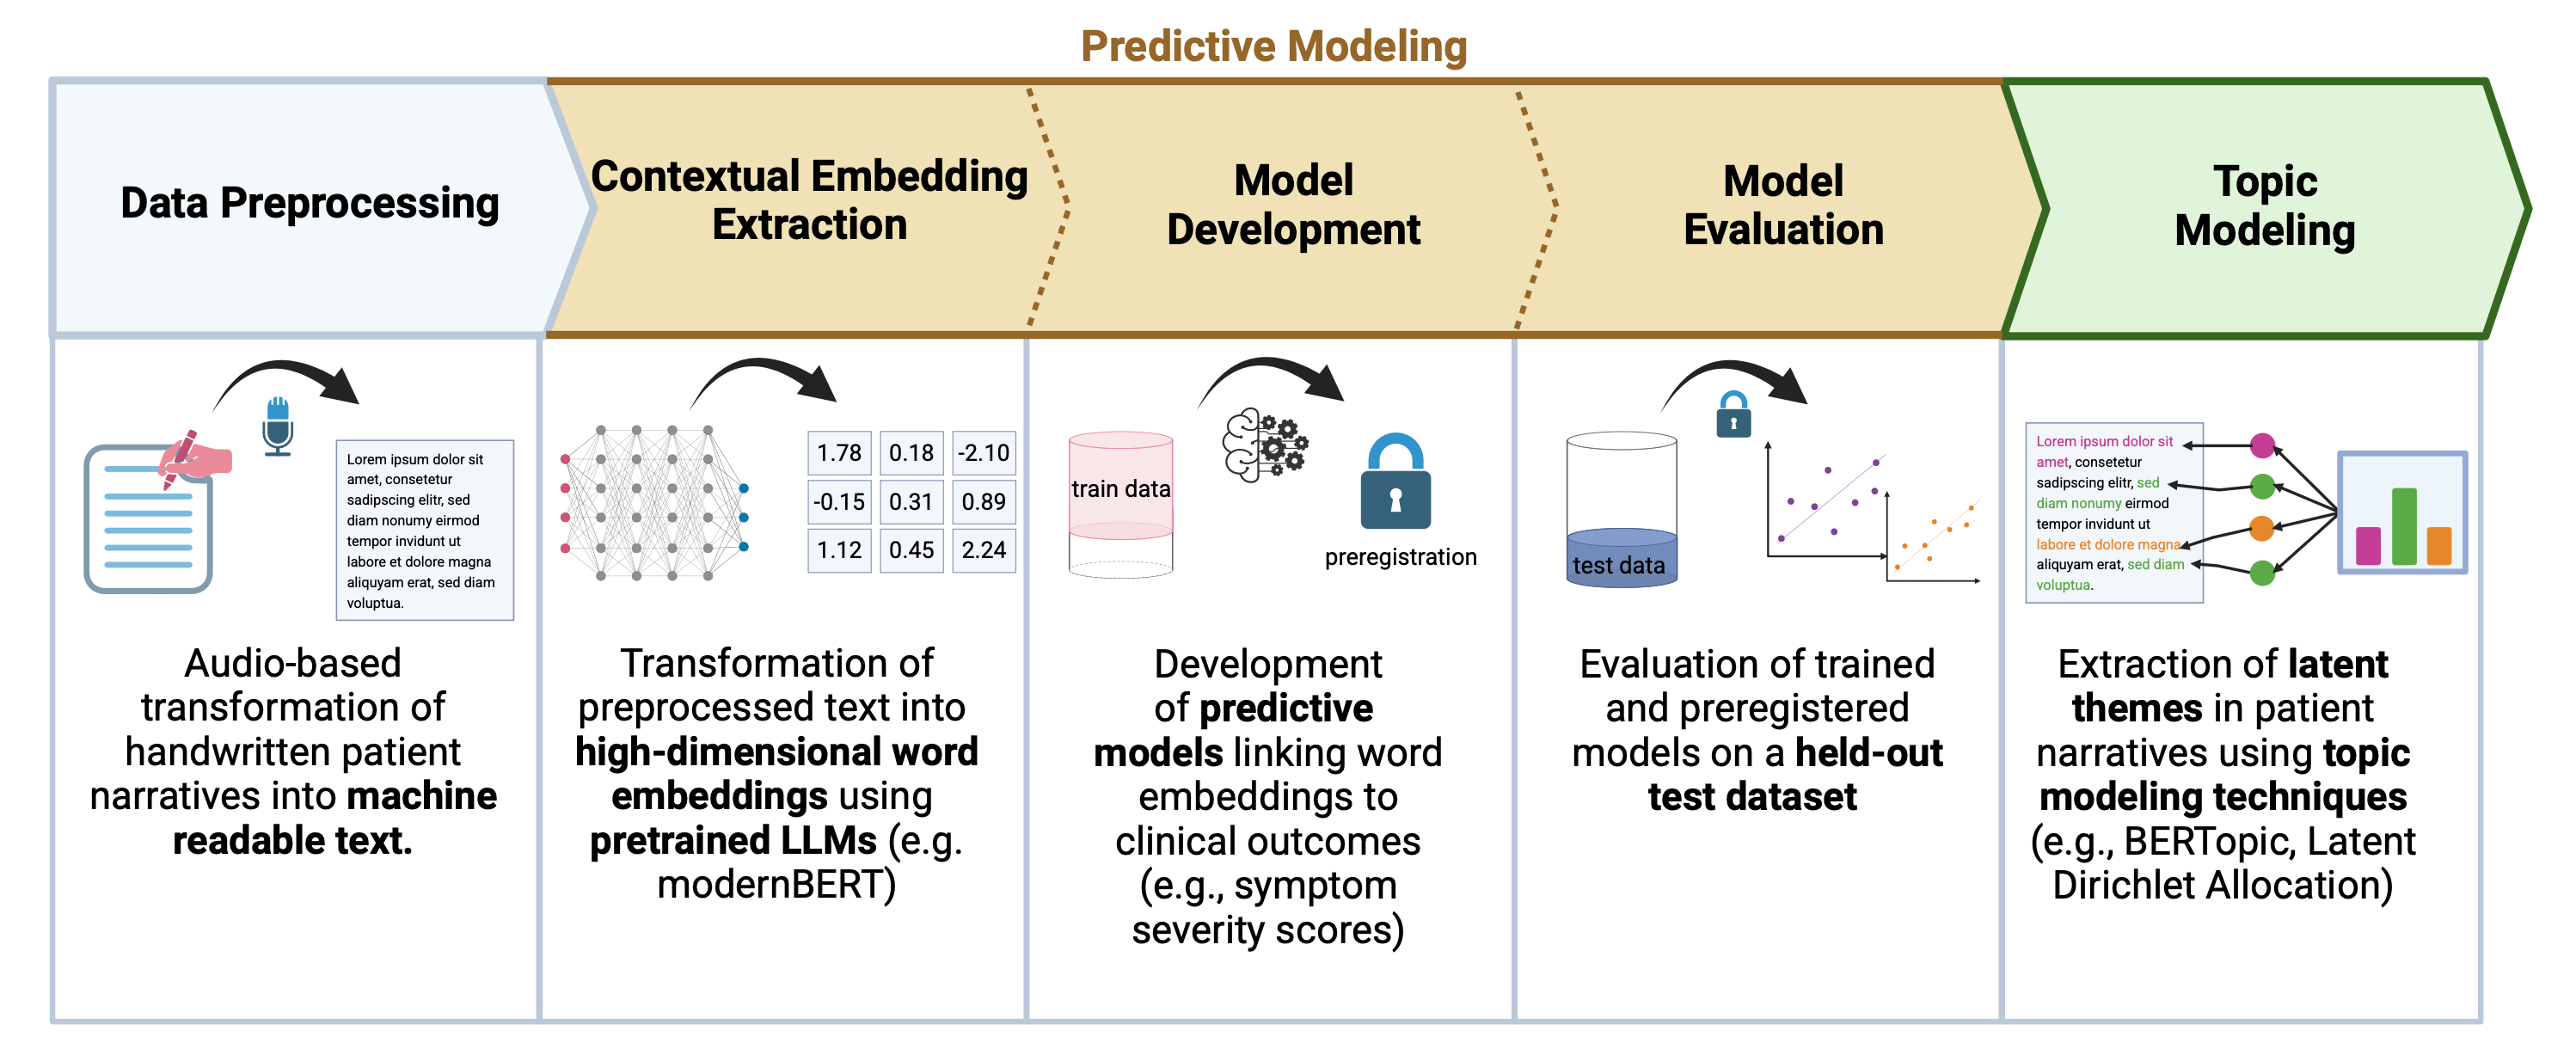
<figcaption>The step-by-step process of patient narrative analysis, from preprocessing to data evaluation.</figcaption>
</figure>

## Substudy 2: Patient narratives and themes

**Core research question.** How do patients conceptualize the their mental health problems, as well as anticipated improvements, and how do these narrative patterns vary across individuals and clinical groups?

**Conceptual contribution.** This substudy emphasizes interpretation and theory generation, using patient language to uncover recurring narrative themes. By analyzing these themes, this substudy provides insight into how narrative content and response patterns relate to diagnostic categories, baseline severity or sociodemographic (e.g. age, gender) and anamnestic (e.g. childhood trauma) characteristics.

**Text inputs.** Q1 *Problem development*, Q2 *Extra stressors*, Q3 *Pre-onset changes*, Q6 *Problem causes*, Q7 *Expected improvements*, Q8 *Environment response*. Question-wise modeling.

**Outcomes.** No single predictive outcome is specified, as the primary aim is interpretive and theory-generating rather than predictive.

**Models & evaluation.** Topic modeling / embedding-based clustering; interpretive labeling; comparison of topic prevalence across patient groups.

## Substudy 3: Predicting treatment response and goal attainment (longitudinal prediction)

**Core research question.** Can patients’ pre-therapy language predict clinically meaningful treatment outcomes beyond baseline symptom severity and demographic characteristics?

**Conceptual contribution.** This substudy extends language-based mental health assessment from cross-sectional validity to prognostic utility. While prior work has primarily examined whether language reflects current symptom severity, far less is known about whether pre-therapy narratives encode information relevant for future treatment response, such as motivation, goal clarity, perceived agency, or narrative coherence. By evaluating the ability of pre-therapy language to predict longitudinal outcomes above and beyond baseline symptom and well-being measures, this substudy tests whether patient-generated text captures clinically actionable signals that are not accessible through standard intake questionnaires alone.

**Text inputs.** Primary: Q10, Q12, Q7, Q1; Secondary: concatenation models.

**Outcomes.**

-   Clinician-rated improvement (CGI-Improvement) at 6 months-follow-up assessment.

-   Global therapy outcome ratings (patient- and therapist-reported) at 6 months-follow-up assessment.

-   Goal Attainment Scale at 6 months-follow-up assessment.

-   Pre-Post differences in symptom (BDI-II, BSI/GSI, DASS-42) and well-being (PMH) scales .

**Models & evaluation.**

-   Baseline prognostic models: Demographic variables and baseline symptom severity and well-being (e.g., BDI-II, BSI/GSI, PMH, CGI-Severity).

-   Language-augmented models: Baseline predictors plus language representations derived from pre-therapy text.

## Substudy 4: Prompt-based LLM rubrics for interpretable language assessment

**Core research question.** Can prompt-based large language models (LLMs) reliably extract interpretable, clinically meaningful rubric scores from pre-therapy narratives, and do these rubric-based language measures add incremental value beyond (a) standardized questionnaires and (b) embedding-based language representations?